In [1]:
import pandas as pd
import numpy as np
from pycaret import regression

In [2]:
df = pd.read_csv('Data/Usecase1_Dataset.csv')
df.head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...


# Exploratory Data Analysis

* The Dataset has 60 columns and 11746 total rows.
* There are NULL values in several of the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

* Replace 'Not Available; with NaN in Dataset

In [4]:
df.replace('Not Available',np.nan,inplace=True)

# Datatype Converion and Missing Value Treatment

* Converting numeric columns with wrong datatype to float.
* Formatting Text Columns and asserting their datatype to string.
* Replacing Missing Values for Numeric Columns with corresponding Median Value.
* Dropping the Unwanted Columns from the Dataset.
* Standardizing values in 'property_type' column

In [5]:
numeric_terms=['ft²','kBtu','(therms)','(kWh)','(Metric Tons CO2e)','(kgal)','ENERGY STAR Score']

for col in list(df.columns):
    for term in numeric_terms:
        if (term in col):
            df[col] = df[col].astype(float)

In [6]:
df['BBL - 10 digits'] = df['BBL - 10 digits'].str.extract('(\d+)', expand=False)
df['Borough'] = df['BBL - 10 digits'].str[0]
df['Tax Block'] = df['BBL - 10 digits'].str[1:6]
df['Tax Lot'] = df['BBL - 10 digits'].str[6:10]
df['Postal Code'] = df['Postal Code'].astype(str)
df['Year Built'] = df['Year Built'].astype(str)
df['Borough'] = df['Borough'].astype(str)
df['Tax Block'] = df['Tax Block'].astype(str)
df['Tax Lot'] = df['Tax Lot'].astype(str)
df['Property Id'] = df['Property Id'].astype(str)

In [7]:
zero_col = ['Water Intensity (All Water Sources) (gal/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)',
            'Total GHG Emissions (Metric Tons CO2e)','Weather Normalized Site Electricity Intensity (kWh/ft²)',
            'Total GHG Emissions (Metric Tons CO2e)'
            ]

for col in zero_col:
    df[col].replace(np.nan,df[col].median() , inplace = True)

In [8]:
prop_col = ['2nd Largest Property Use Type','3rd Largest Property Use Type']

for col in prop_col:
    df[col].replace(np.nan, 'none', inplace = True)

In [9]:
drop_items = ['NYC Borough, Block and Lot (BBL) self-reported',
            'NYC Building Identification Number (BIN)',
            'BBL - 10 digits',
            'Parent Property Name',
            'Property Name',
            'Address 1 (self-reported)',
            'Address 2',
            'Street Number',
            'Street Name',
            'Latitude',
            'Longitude',
            'DOF Gross Floor Area',
            'DOF Benchmarking Submission Status',
            'List of All Property Use Types at Property',
            'Largest Property Use Type - Gross Floor Area (ft²)',
            '2nd Largest Property Use - Gross Floor Area (ft²)',
            '3rd Largest Property Use Type - Gross Floor Area (ft²)',                     
            'Fuel Oil #1 Use (kBtu)',                                         
            'Fuel Oil #2 Use (kBtu)',                                         
            'Fuel Oil #4 Use (kBtu)',                                         
            'Fuel Oil #5 & 6 Use (kBtu)',                                     
            'Diesel #2 Use (kBtu)',                                           
            'District Steam Use (kBtu)',                                      
            'Natural Gas Use (kBtu)',                                         
            'Weather Normalized Site Natural Gas Use (therms)',               
            'Electricity Use - Grid Purchase (kBtu)',                         
            'Weather Normalized Site Electricity (kWh)',                      
            'Direct GHG Emissions (Metric Tons CO2e)',                        
            'Indirect GHG Emissions (Metric Tons CO2e)',                      
            'Property GFA - Self-Reported (ft²)',                              
            'Water Use (All Water Sources) (kgal)', 
            'Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Source EUI (kBtu/ft²)'
           ]

df.drop(drop_items, axis = 1, inplace = True)

In [10]:
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
            'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
            'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [11]:
df['Largest Property Use Type'] = df['Largest Property Use Type'].map(property_type).astype(str)
df['2nd Largest Property Use Type'] = df['2nd Largest Property Use Type'].map(property_type).astype(str)
df['3rd Largest Property Use Type'] = df['3rd Largest Property Use Type'].map(property_type).astype(str)

In [12]:
new_droplist = ['Metered Areas (Energy)','Metered Areas  (Water)','Release Date','Water Required?','Community Board','Council District','Census Tract','NTA']
df.drop(new_droplist, axis = 1, inplace = True)

In [13]:
#df.info()
df['ENERGY STAR Score'][df['ENERGY STAR Score'].isna()] = df['ENERGY STAR Score'].median()
df['Site EUI (kBtu/ft²)'][df['Site EUI (kBtu/ft²)'].isna()] = df['Site EUI (kBtu/ft²)'].median()
df['Source EUI (kBtu/ft²)'][df['Source EUI (kBtu/ft²)'].isna()]= df['Source EUI (kBtu/ft²)'].median()

C:\Users\swati.acharjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\swati.acharjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\swati.acharjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

# LabelEncoder

* Converting the labels to machine-readable form.
* Dropping the Original columns from Dataset

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['n_Postal Code'] = le.fit_transform(df['Postal Code'])
df['n_Parent Property Id'] = le.fit_transform(df['Parent Property Id'])
df['n_Property Id'] = le.fit_transform(df['Property Id'])
df['n_Tax Lot'] = le.fit_transform(df['Tax Lot'])
df['n_Tax Block'] = le.fit_transform(df['Tax Block'])
df['n_3rd Largest Property Use Type'] = le.fit_transform(df['3rd Largest Property Use Type'])
df['n_2nd Largest Property Use Type'] = le.fit_transform(df['2nd Largest Property Use Type'])
df['n_Primary Property Type - Self Selected'] = le.fit_transform(df['Primary Property Type - Self Selected'])
df['n_Borough'] = le.fit_transform(df['Borough'])
df['n_Largest Property Use Type'] = le.fit_transform(df['Largest Property Use Type'])

#oe = OrdinalEncoder() -- discretize!!
df['n_Year Built'] = le.fit_transform(df['Year Built'])

In [15]:
selection = ['Postal Code','Parent Property Id','Property Id','Tax Lot','Tax Block',
        '3rd Largest Property Use Type','2nd Largest Property Use Type',
        'Primary Property Type - Self Selected','Year Built','Borough','Largest Property Use Type']

df = df.drop(selection, axis = 1)

* Final DataSet - 21 Columns, 11746 Rows with no NULL values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 21 columns):
Order                                                         11746 non-null int64
Number of Buildings - Self-reported                           11746 non-null int64
Occupancy                                                     11746 non-null int64
ENERGY STAR Score                                             11746 non-null float64
Site EUI (kBtu/ft²)                                           11746 non-null float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       11746 non-null float64
Weather Normalized Site Natural Gas Intensity (therms/ft²)    11746 non-null float64
Total GHG Emissions (Metric Tons CO2e)                        11746 non-null float64
Water Intensity (All Water Sources) (gal/ft²)                 11746 non-null float64
Source EUI (kBtu/ft²)                                         11746 non-null float64
n_Postal Code                                  

# Train-Test Split of given Dataset

* 67% of Data ,i.e., 8222 rows Used for building Training Set
* 33% of Data ,i.e., 3524 rows Used for building Testing Set

In [46]:
X_cols = df.columns.tolist()
X_cols.remove('ENERGY STAR Score')
#y_cols = df['ENERGY STAR Score']

X_df = df[X_cols]
y_df = df['ENERGY STAR Score']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8222, 21)
(8222,)
(3524, 21)
(3524,)


# PyCaret - Setting up the environment for Regression Algorithmns

* Regression SetUp - with Target Column 'ENERGY STAR Score'
* Comparing Models - with corresponding MAE, MAPE, MSE, Model Name, R2, RMSE, RMSLE
* Best Model - RandomForest, with 73% R2 Score and 14.13 RMSE

In [18]:
regression_setup = regression.setup(data= df, target='ENERGY STAR Score')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4415
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(11746, 21)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [37]:
regression.compare_models()

IntProgress(value=0, description='Processing: ', max=245)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:52:30
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,MAE,MAPE,MSE,Model,R2,RMSE,RMSLE
0,1.020520e+01,7.235000e-01,2.001377e+02,Random Forest,7.305000e-01,1.413990e+01,0.5135
1,1.086820e+01,8.983000e-01,2.132819e+02,Extra Trees Regressor,7.127000e-01,1.459510e+01,0.5618
2,1.133700e+01,8.722000e-01,2.189090e+02,Extreme Gradient Boosting,7.050000e-01,1.479000e+01,0.5610
3,1.133490e+01,8.766000e-01,2.191133e+02,Gradient Boosting Regressor,7.048000e-01,1.479690e+01,0.5624
4,1.482320e+01,1.388500e+00,3.143014e+02,AdaBoost Regressor,5.772000e-01,1.772500e+01,0.6791
5,1.301800e+01,7.751000e-01,3.858265e+02,Decision Tree,4.805000e-01,1.962650e+01,0.6445
6,2.061540e+01,2.088100e+00,6.722891e+02,K Neighbors Regressor,9.610000e-02,2.592260e+01,0.8223
7,2.127580e+01,2.528600e+00,7.202888e+02,Lasso Regression,3.200000e-02,2.683170e+01,0.8665
8,2.126360e+01,2.530800e+00,7.204021e+02,Elastic Net,3.190000e-02,2.683380e+01,0.8666
9,2.126510e+01,2.536200e+00,7.214311e+02,Bayesian Ridge,3.050000e-02,2.685280e+01,0.8672


LightGBMError: Do not support non-ASCII characters in feature name.

* Create RandomForest Regression Model
* Evaluating the Model
* Store the Predicted Values for Evaluation

In [19]:
rf_pred = regression.create_model('rf')

,MAE,MAPE,MSE,R2,RMSE,RMSLE
0,10.5139,0.6773,212.9084,0.7060,14.5914,0.5041
1,10.2465,0.5434,198.5531,0.7265,14.0909,0.4778
2,10.4509,0.6941,204.3470,0.7263,14.2950,0.5174
3,10.1027,0.8282,195.8354,0.7459,13.9941,0.5536
4,9.9689,0.6360,196.3796,0.7454,14.0136,0.4927
5,10.5488,0.7991,218.6660,0.6950,14.7874,0.5398
6,9.9480,0.7366,190.2039,0.7372,13.7914,0.5111
7,9.9705,0.7572,196.9269,0.7494,14.0331,0.5260
8,9.9573,0.6552,191.6462,0.7363,13.8436,0.4881
9,10.4184,0.6176,213.7452,0.7115,14.6200,0.4892


In [20]:
predictions = regression.predict_model(rf_pred, data=X_test)
predictions.Label.head()

0    52.92
1    89.91
2    89.28
3    87.98
4    53.28
Name: Label, dtype: float64

In [21]:
df_pred = X_test.copy()
df_pred['ENERGY STAR Score'] = y_test
df_pred.reset_index(inplace=True)
df_pred['Pred ENERGY STAR Score'] = predictions.Label
df_pred[['ENERGY STAR Score','Pred ENERGY STAR Score']].head()

,ENERGY STAR Score,Pred ENERGY STAR Score
0,65.0,52.92
1,97.0,89.91
2,88.0,89.28
3,92.0,87.98
4,38.0,53.28


In [41]:
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(df_pred['ENERGY STAR Score'],df_pred['Pred ENERGY STAR Score']))

r2_score:  0.8931401079386486


# Energy Category Function 

* Assign Category based on Energy Score
* Apply category to both Original and Predicted Energy Score for Evaluation

In [37]:
def get_energy_category(x):
    cat = ' '
    if x >= 85:
        cat = 'A'
    elif (x>=75 and x<85):
        cat = 'B'
    elif (x>=50 and x<75):
        cat = 'C'
    elif x <50:
        cat = 'D'
    else:
        cat = 'F'
    return cat

In [39]:
df_pred['Org Energy Category'] = df_pred['ENERGY STAR Score'].apply(lambda x: get_energy_category(x))
df_pred['Pred Energy Category'] = df_pred['Pred ENERGY STAR Score'].apply(lambda x: get_energy_category(x))
df_pred[['ENERGY STAR Score','Org Energy Category','Pred Energy Category','Pred ENERGY STAR Score']].head()

,ENERGY STAR Score,Org Energy Category,Pred Energy Category,Pred ENERGY STAR Score
0,65.0,C,C,52.92
1,97.0,A,A,89.91
2,88.0,A,A,89.28
3,92.0,A,A,87.98
4,38.0,D,C,53.28


In [47]:
from sklearn.metrics import classification_report
print(classification_report(df_pred['Org Energy Category'], df_pred['Pred Energy Category']))

              precision    recall  f1-score   support

           A       0.97      0.77      0.86       759
           B       0.51      0.60      0.55       371
           C       0.81      0.86      0.83      1395
           D       0.88      0.88      0.88       999

    accuracy                           0.82      3524
   macro avg       0.79      0.78      0.78      3524
weighted avg       0.83      0.82      0.82      3524



* Predicted Energy Score and Category on Test Dataset is stored in Energy_Star_Score_Prediction document under Data folder, for reference.

In [49]:
df_pred.to_excel('Data/Energy_Star_Score_Prediction.xlsx')

# Model Interpretion

* Interpreting the impacting Attribute in the model.
* Source, n_Largest Propert Use Type, Site EUI - are TOP 3 impacting columns on the Prediction.

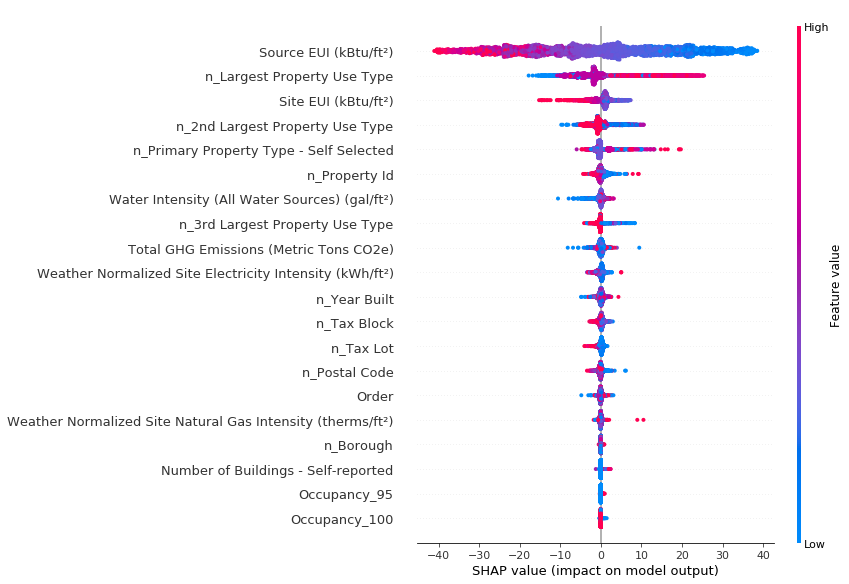

In [50]:
regression.interpret_model(rf_pred)